# Image Classification with CNN - LeNet5 architecture

In this exercise, we will apply the LeNet5 algorithm to the Fashion MNIST dataset and improve your performances.

We will first download the data:

In [1]:
# TODO: Load the dataset
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# # # If your computer is slow, try to use a subset of data, e.g.
# X_train = X_train[:10000]
# y_train = y_train[:10000]
# X_test = X_test[:2000]
# y_test = y_test[:2000]
X_train.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(60000, 28, 28)

As you already know, this dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

You can have a look at some images if needed, even if you already know them.

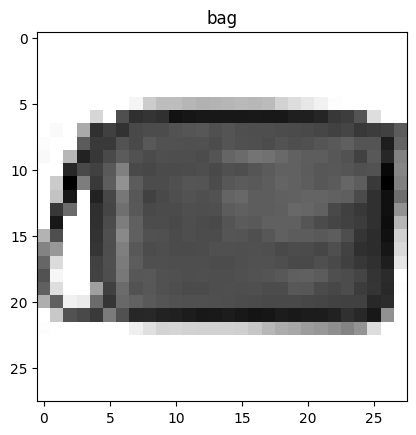

In [2]:
# TODO: Explore the data, display some input images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap="gray_r")
plt.title(label_class[y_train[idx]])
plt.show()

Make the data preparation and preprocessing: scale and reshape the data, put the labels to the good shape.

In [3]:
# TODO: Make the data preparation
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

X_train_norm = X_train/255
X_test_norm = X_test/255


X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], 28, 28, 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], 28, 28, 1)

X_train_norm.shape #Should be (60000, 28, 28, 1)

(60000, 28, 28, 1)

Now build the LeNet5 architecture. You can reuse the one of the course, or try to build it by yourself.

The architecture is the following:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1WteTU2FPIVMkBKmMxGpFm5OjsX-szTbB">
</p>

In [4]:
# TODO: Build your model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense


def lenet5():

    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, name='C1', kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2), name='S2'))
    # Layer C3
    model.add(Conv2D(filters=16, name='C3', kernel_size=(3, 3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2), name='S4'))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(120, activation='relu', name='C5'))
    # Layer F6
    model.add(Dense(84, activation='relu', name='F6'))
    # Output layer
    model.add(Dense(units=10, activation = 'softmax'))

    return model

lenet5().summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ C1 (Conv2D)                     │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S2 (MaxPooling2D)               │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C3 (Conv2D)                     │ (None, 11, 11, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S4 (MaxPooling2D)               │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C5 (Dense)                      │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ F6 (Dense)                      │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,074 (234.66 KB)

 Trainable params: 60,074 (234.66 KB)

 Non-trainable params: 0 (0.00 B)

Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [5]:
# TODO: Compile and fit your model
import os

# os.environ['KMP_DUPLICATE_LIB_OK']='True' #https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

model = lenet5()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define now our callbacks
# callbacks = [EarlyStopping(monitor='val_loss', patience=10), TensorBoard(log_dir='./keras-logs', histogram_freq=0, write_graph=True, write_images=True)]
callbacks = [EarlyStopping(monitor='val_loss', patience=10)]

# Finally fit the model
model.fit(x=X_train_norm, y=y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=100, batch_size=2048, callbacks=callbacks)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.3676 - loss: 2.0444 - val_accuracy: 0.6673 - val_loss: 0.9752
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6878 - loss: 0.8721 - val_accuracy: 0.7295 - val_loss: 0.7344
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7379 - loss: 0.6887 - val_accuracy: 0.7601 - val_loss: 0.6334
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7779 - loss: 0.5932 - val_accuracy: 0.7838 - val_loss: 0.5684
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7981 - loss: 0.5381 - val_accuracy: 0.7906 - val_loss: 0.5529
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8086 - loss: 0.5118 - val_accuracy: 0.8162 - val_loss: 0.5071
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8225 - loss: 0.4854 - val_accuracy: 0.8159 - val_loss: 0.4923
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8297 - loss: 0.4572 - val_accuracy: 

Have a look at the tensorboard and see if it gives a deeper understanding of your model.

Compute then the accuracy of your model. Is it better than a regular MLP used before?

In [6]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size = 1024
y_pred_train = to_categorical(model.predict(X_train_norm, batch_size=batch_size).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test_norm, batch_size=batch_size).argmax(axis=1), num_classes=10)

print('accuracy on train with CNN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with CNN:', accuracy_score(y_pred_test, y_test_cat))

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
accuracy on train with CNN: 0.9263666666666667
accuracy on test with CNN: 0.8989


We will now add image augmentation to improve our results, especially we will try to reduce overfitting this way.

To do so, you can use `ImageDataGenerator` from Keras that makes all the work for you (including rescaling), with the following parameter:
* `horizontal_flip=True`

For more info about how the `ImageDataGenerator` works, you can check out [this article](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/).

Begin by creating an object `ImageDataGenerator` with this parameter.

In [7]:
# TODO: Instantiate an ImageDataGenerator object
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True)

Finally, you can train your model using this generator, with the method `fit_generator` of your model and the method `flow` of your `ImageDataGenerator`.

In [8]:
# TODO: train your model
batch_size = 1024
model.fit(datagen.flow(X_train_norm, y_train_cat, batch_size=batch_size),
                    validation_data=(X_test_norm, y_test_cat), callbacks=callbacks,
                    steps_per_epoch=len(X_train_norm) // batch_size, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.8334 - loss: 0.6411 - val_accuracy: 0.8877 - val_loss: 0.3201
Epoch 2/100
 1/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8818 - loss: 0.3299

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8818 - loss: 0.3299 - val_accuracy: 0.8881 - val_loss: 0.3175
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8970 - loss: 0.2862 - val_accuracy: 0.8899 - val_loss: 0.3110
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8926 - loss: 0.3001 - val_accuracy: 0.8875 - val_loss: 0.3132
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8980 - loss: 0.2777 - val_accuracy: 0.8941 - val_loss: 0.2982
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9150 - loss: 0.2230 - val_accuracy: 0.8933 - val_loss: 0.3023
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9036 - loss: 0.2639 - val_accuracy: 0.8890 - val_loss: 0.3151
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8799 - loss: 0.2798 - val_accuracy: 0.8856 - val_loss: 0.3209
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8986 - loss: 0.2731 - val_accuracy: 0.8959 - val_l

Not sure why it only got to 67 epochs, I tried running this cell multiple times and it ran for a different number of epochs each time. Meant to be 100 epochs.

Recompute the accuracy of your model, does it improve your performances with data augmentation?

In [9]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size=1024
y_pred_train = to_categorical(model.predict(X_train_norm, batch_size=batch_size).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test_norm, batch_size=batch_size).argmax(axis=1), num_classes=10)

print('accuracy on train with CNN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with CNN:', accuracy_score(y_pred_test, y_test_cat))

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
accuracy on train with CNN: 0.9308666666666666
accuracy on test with CNN: 0.9016


You can now try to improve even more your results. For example, add more parameters to your `ImageDataGenerator`, play with some hyperparameters, and so on...